In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_mask(mask, ax, random_color=False, text=None):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    if text != None:
        ax.set_title(text, fontsize=15)
    ax.imshow(mask_image)
    ax.axis('off')
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


In [3]:
image = cv2.imread('images/truck.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
sam_checkpoint = "/home/xaiplanet/new_workspace/SAM_meta/segment-anything/sam_vit_h_4b8939.pth"
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
model_type = "default"

In [5]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor
from segment_anything.modeling.prompt_encoder import PromptEncoder

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

## 모델에 이미지 세팅

In [6]:
predictor.set_image(image)

In [ ]:
mask_input = logits[np.argmax(scores), :, :]  # Choose the model's best mask

### 4. points 와 boxes promts 입력

In [65]:
input_box = np.array([425, 600, 700, 875])
input_point = np.array([[575, 750]])
input_label = np.array([0])

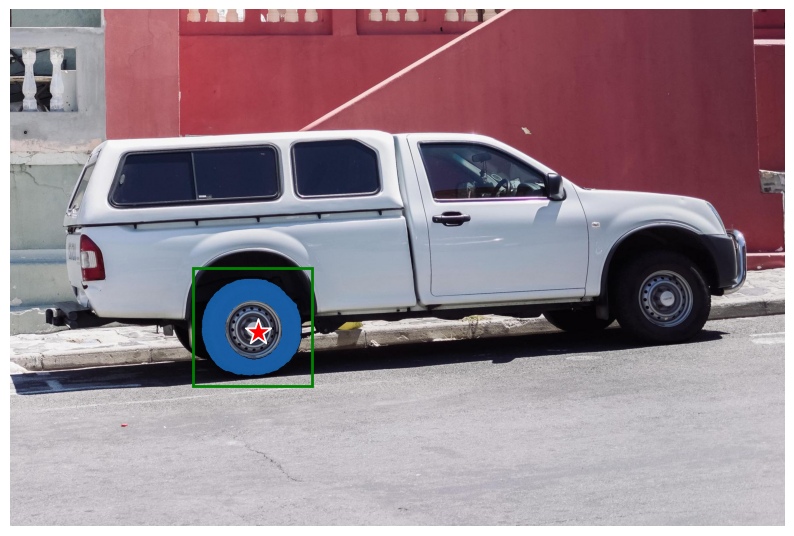

In [66]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

In [67]:
input_box = np.array([425, 600, 700, 875])
input_point = np.array([[575, 750]])
input_label = np.array([1])

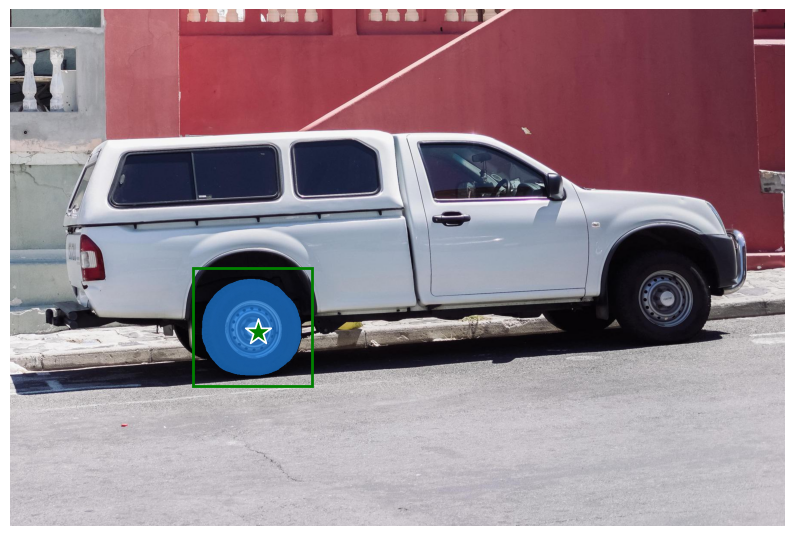

In [68]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

In [ ]:
input_box = np.array([425, 600, 700, 875])
input_point = np.array([[575, 750]])
input_label = np.array([1])

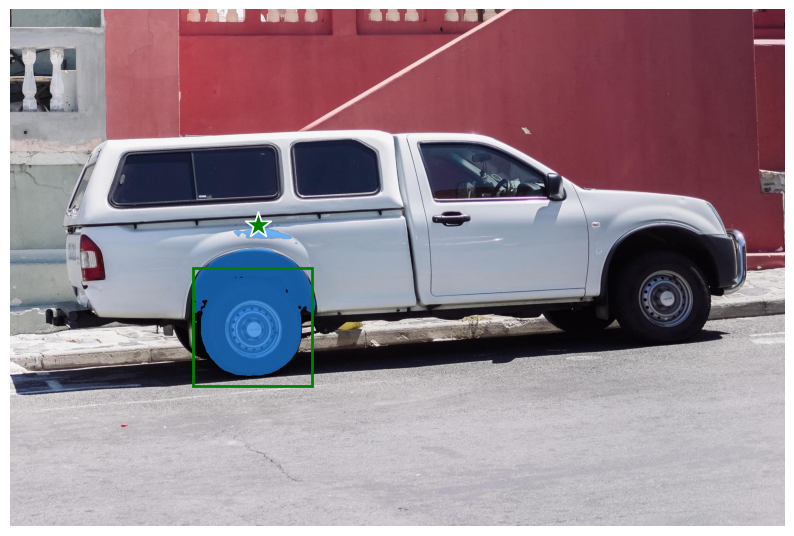

In [11]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

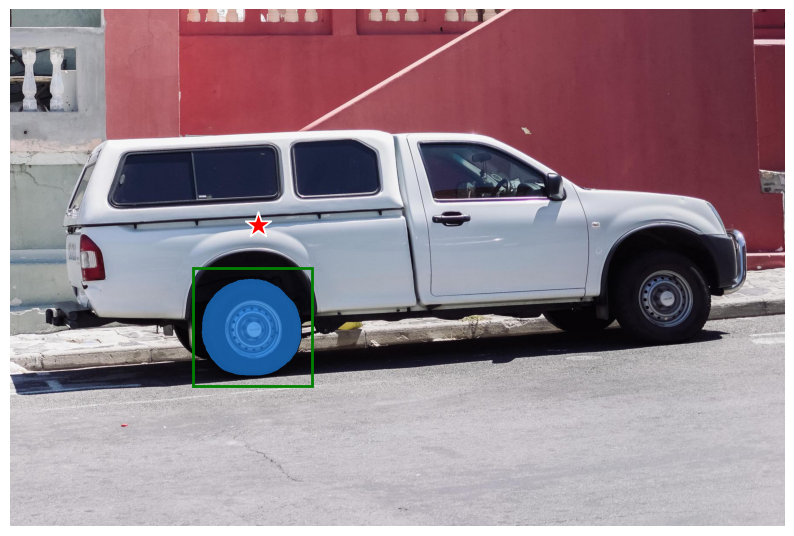

In [13]:
input_box = np.array([425, 600, 700, 875])
input_point = np.array([[575, 500]])
input_label = np.array([0])

masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

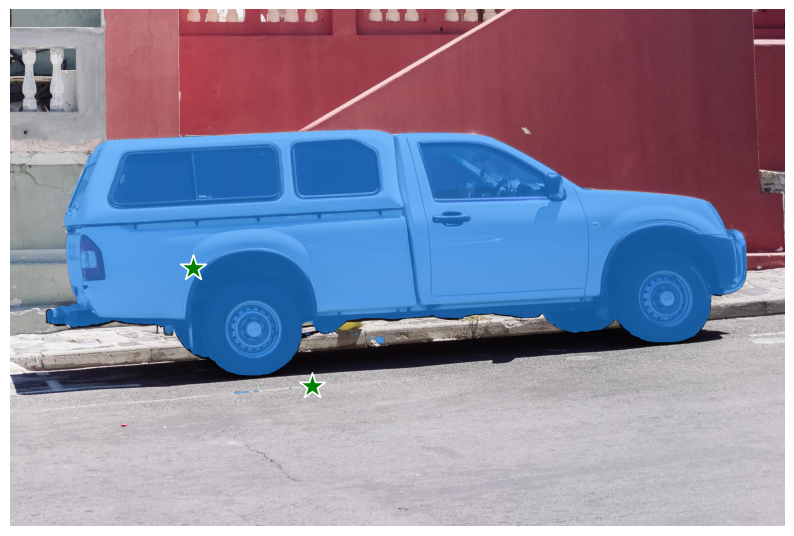

In [17]:
# input_box = np.array([425, 600, 700, 875])
input_point = np.array([[425, 600,], [700, 875]])
input_label = np.array([1, 1])

masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    # box=input_box,
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
# show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

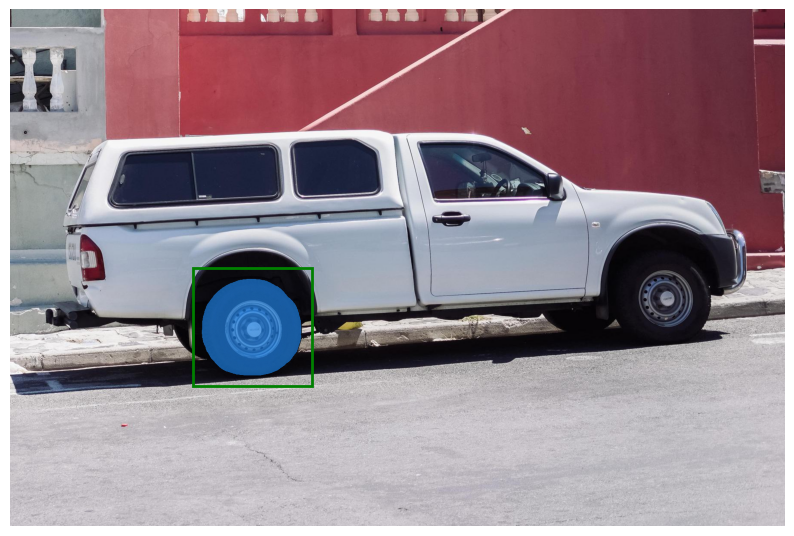

In [18]:
input_box = np.array([425, 600, 700, 875])
# input_point = np.array([[425, 600,], [700, 875]])
# input_label = np.array([1, 1])

masks, _, _ = predictor.predict(
    # point_coords=input_point,
    # point_labels=input_label,
    box=input_box,
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
# show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

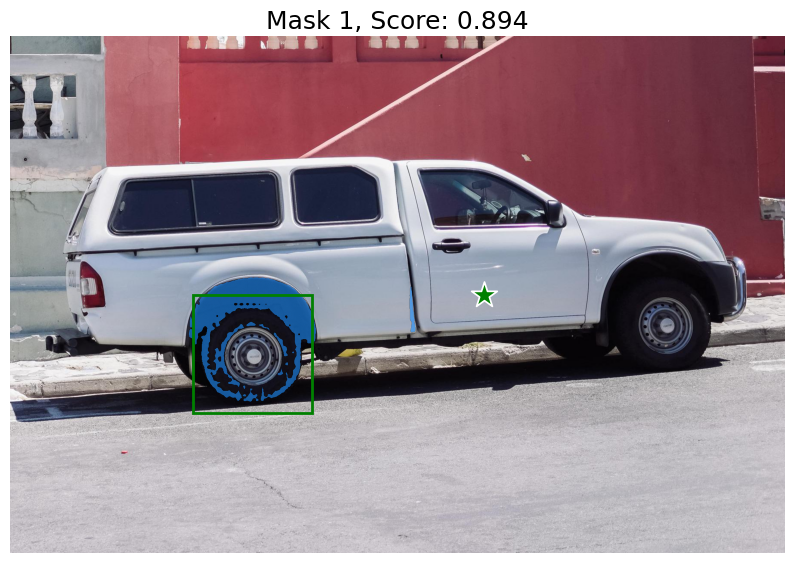

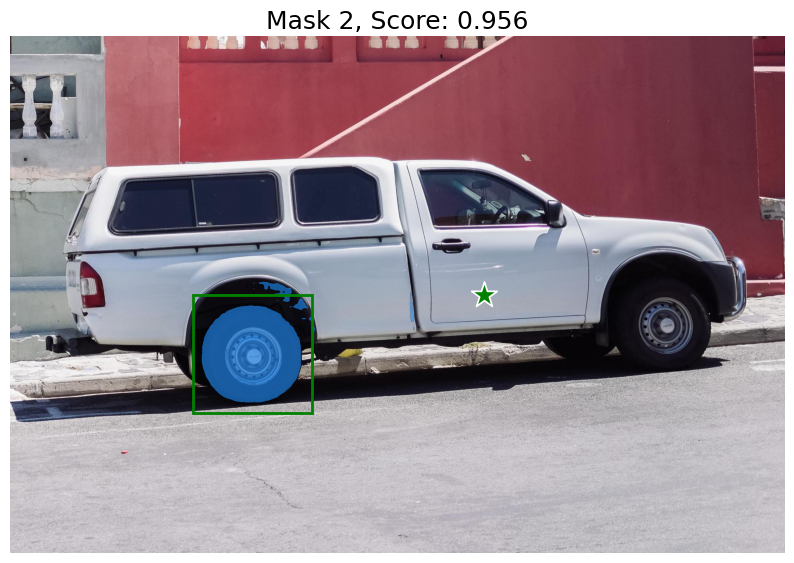

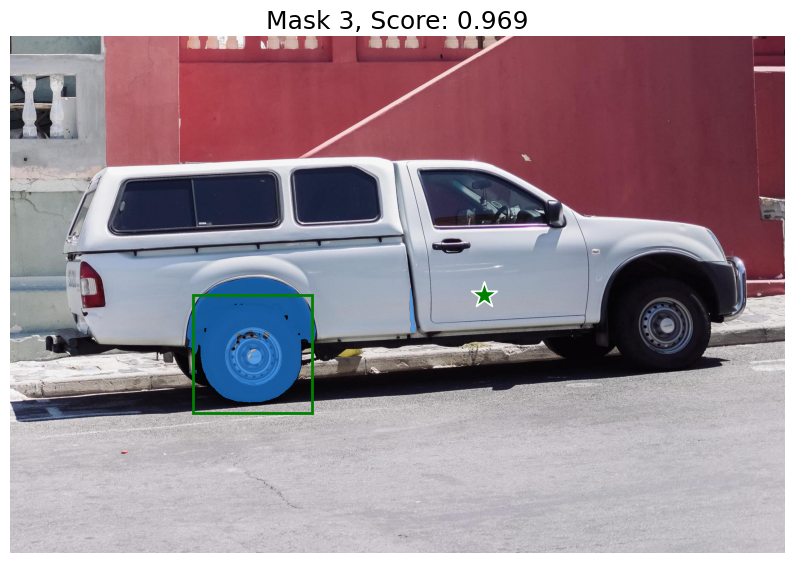

In [17]:
input_box = np.array([425, 600, 700, 875])
input_point = np.array([[1100, 600]])
input_label = np.array([1])

masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=True,
)

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_box(input_box, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

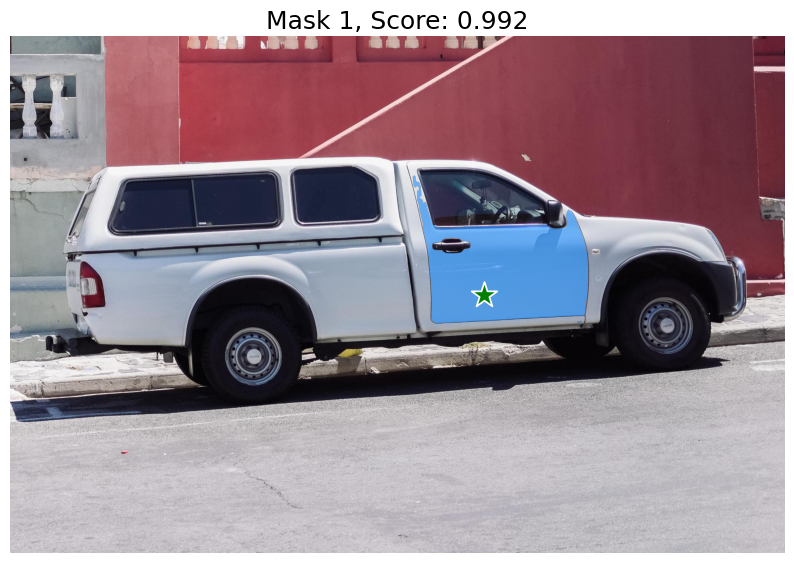

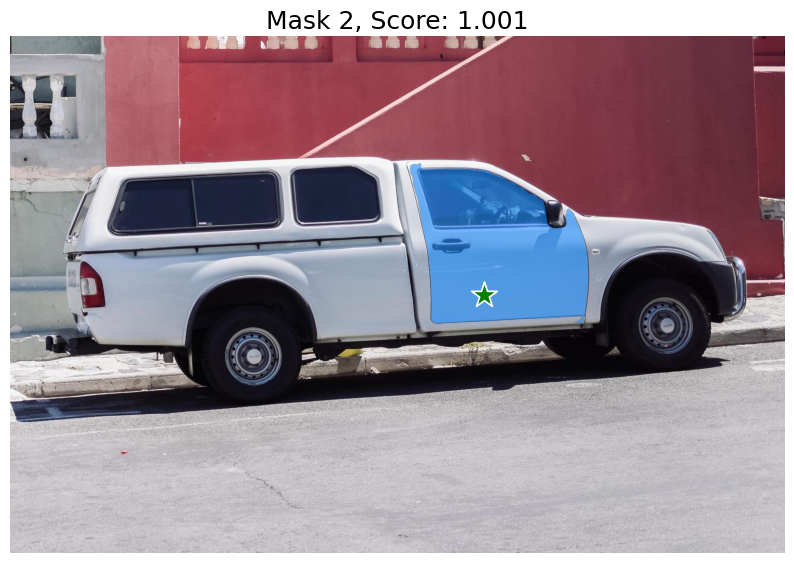

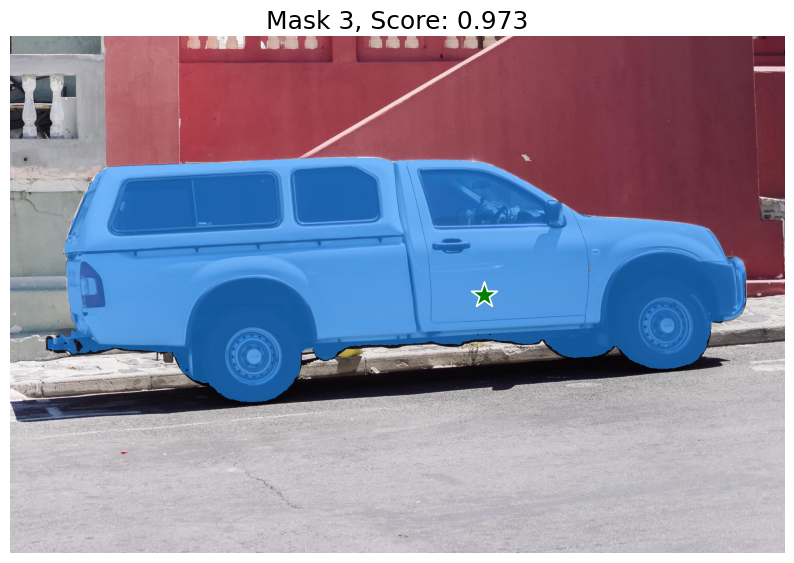

In [15]:
input_box = np.array([425, 600, 700, 875])
input_point = np.array([[1100, 600]])
input_label = np.array([1])

masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    # box=input_box,
    multimask_output=True,
)

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    # show_box(input_box, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
    

In [8]:
input_box = np.array([[425, 600, 700, 875], [1375, 550, 1650, 800]])
input_point = np.array([[1100, 600]])
input_label = np.array([1])

masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
# show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

RuntimeError: Sizes of tensors must match except in dimension 0. Got 2 and 1 (The offending index is 0)

In [27]:
image1 = image  # truck.jpg from above
image1_boxes = torch.tensor([
    [75, 275, 1725, 850],
    [425, 600, 700, 875],
    [1375, 550, 1650, 800],
    [1240, 675, 1400, 750],
], device=sam.device)
image1_points = torch.tensor([
    [400, 500],
    [666, 800],
], device=sam.device)
image1_points_labels = torch.tensor([1, 1], device=sam.device)

image2 = cv2.imread('images/groceries.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2_boxes = torch.tensor([
    [450, 170, 520, 350],
    [350, 190, 450, 350],
    [500, 170, 580, 350],
    [580, 170, 640, 350],
], device=sam.device)


In [10]:
from segment_anything.modeling.prompt_encoder import PositionEmbeddingRandom

In [50]:
boxes = torch.tensor([
    [450, 170, 520, 350],
    [350, 190, 450, 350],
    [500, 170, 580, 350],
    [580, 170, 640, 350],
]).float().unsqueeze(0)

points = torch.tensor([[500, 375], [1125, 625], [126, 555]]).float().unsqueeze(0)

In [51]:
print(points.shape)
print(boxes.shape)

torch.Size([1, 3, 2])
torch.Size([1, 4, 4])


In [64]:
pe_layer = PositionEmbeddingRandom(256 // 2)

In [63]:
pe = pe_layer((256,256)).unsqueeze(0)
pe.shape

torch.Size([1, 256, 256, 256])

In [53]:
coords_boxes = boxes.reshape(-1,2,2)

In [54]:
coords_boxes.shape

torch.Size([4, 2, 2])

In [65]:
corner_embedding = pe_layer.forward_with_coords(coords_boxes, (256, 256))
points_embedding = pe_layer.forward_with_coords(points, (256, 256))

In [66]:
pe_layer((256,256)).unsqueeze(0).shape

torch.Size([1, 256, 256, 256])

In [59]:
sparse_embeddings = torch.empty((4, 0, 256))
sparse_embeddings.shape

torch.Size([4, 0, 256])

In [57]:
points_embedding.shape

torch.Size([1, 3, 256])

In [58]:
corner_embedding.shape

torch.Size([4, 2, 256])

In [48]:
sparse_embeddings = torch.cat([sparse_embeddings, points_embedding], dim=1)
sparse_embeddings.shape

torch.Size([1, 3, 256])

In [60]:
sparse_embeddings = torch.cat([sparse_embeddings, corner_embedding], dim=1)

In [61]:
sparse_embeddings.shape

torch.Size([4, 2, 256])

In [32]:
from segment_anything.utils.transforms import ResizeLongestSide
resize_transform = ResizeLongestSide(sam.image_encoder.img_size)

def prepare_image(image, transform, device):
    image = transform.apply_image(image)
    image = torch.as_tensor(image, device=device.device) 
    return image.permute(2, 0, 1).contiguous()

ImportError: cannot import name 'preprocess' from 'segment_anything.modeling.sam' (/home/xaiplanet/new_workspace/SAM_meta/Grounded-Segment-Anything/segment_anything/segment_anything/modeling/sam.py)

In [28]:
batched_input = [
     {
         'image': prepare_image(image1, resize_transform, sam),
         'boxes': resize_transform.apply_boxes_torch(image1_boxes, image1.shape[:2]),
         'original_size': image1.shape[:2]
     },
     {
         'image': prepare_image(image2, resize_transform, sam),
         'boxes': resize_transform.apply_boxes_torch(image2_boxes, image2.shape[:2]),
         'original_size': image2.shape[:2]
     }
]

In [30]:
img = batched_input[0]['image']

In [31]:
img.shape

torch.Size([3, 683, 1024])

In [108]:
batched_output = sam(batched_input, multimask_output=False)

In [109]:
batched_output[0].keys()

dict_keys(['masks', 'iou_predictions', 'low_res_logits'])

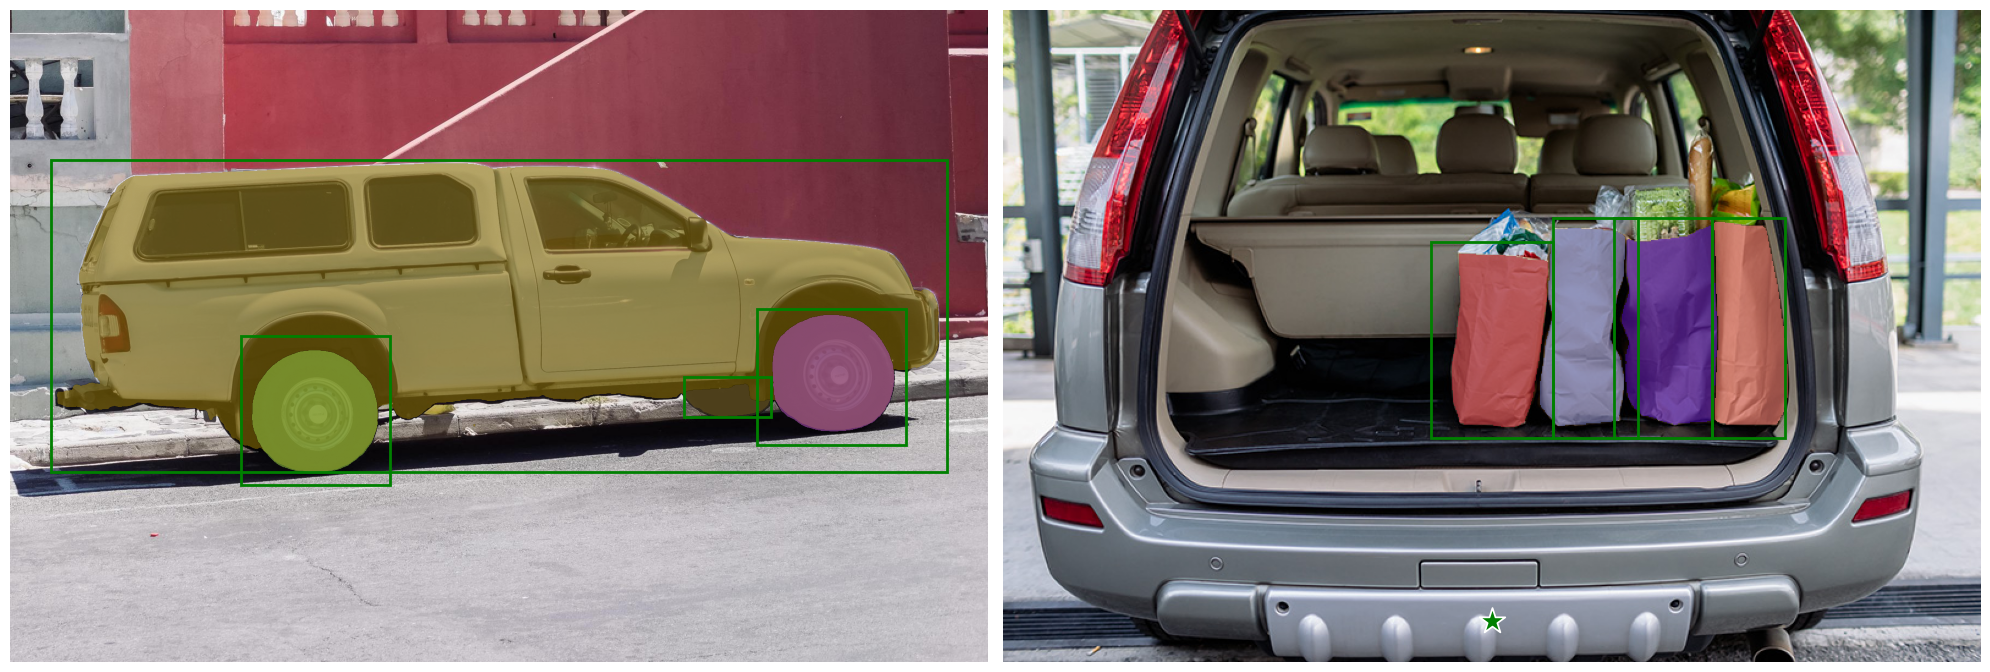

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(image1)
for mask in batched_output[0]['masks']:
    show_mask(mask.cpu().numpy(), ax[0], random_color=True)
for box in image1_boxes:
    show_box(box.cpu().numpy(), ax[0])
for point, label in zip(image1_points, image1_points_labels):
    show_points(point.cpu().numpy(), label.cpu().numpy(), plt.gca())
ax[0].axis('off')

ax[1].imshow(image2)
for mask in batched_output[1]['masks']:
    show_mask(mask.cpu().numpy(), ax[1], random_color=True)
for box in image2_boxes:
    show_box(box.cpu().numpy(), ax[1])
ax[1].axis('off')

plt.tight_layout()
plt.show()